In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import cross_val_score

In [3]:
import seaborn as sns

In [4]:
cust_df = pd.read_csv("cust_df_tuesday2.csv")

In [5]:
cust_df.head().T

,0,1,2,3,4
session_id,exxxxxshop.si-0.00021101047198248773,exxxxxshop.si-0.0002712991769484001,exxxxxshop.si-0.00033158788092821383,exxxxxshop.si-0.00039187658370279567,exxxxxshop.si-0.0004521652850530127
TARGET_successful_purchase,-1,-1,-1,-1,-1
test_or_train_flag,1,1,1,1,1
last_basket_element_number,1,3,12,1,4
last_click_num,1,4,60,13,56
...,...,...,...,...,...
mean_regio_of_customer,-1,2,2,1,-1
mean_sum_price_of_products_in_basket,49.99,54.975,186.955,39.99,139.965
mean_sum_price_of_visited_products,49.99,74.965,1309.32,121.222,2005.92
num_sessions,5,6,21,4,12


In [6]:
cust_df.shape

(49086, 82)

In [7]:
target = 'TARGET_successful_purchase'
bemeno_valtozok = list(cust_df.columns)[3:]

In [8]:
train = cust_df[cust_df['test_or_train_flag']==0].copy()
test = cust_df[cust_df['test_or_train_flag']==1].copy()
print("train: ", train.shape)
print("test: ", test.shape)

train:  (24584, 82)
test:  (24502, 82)


# Filtering features
Ideas: https://stackabuse.com/applying-filter-methods-in-python-for-feature-selection/  


In [9]:
from sklearn.feature_selection import VarianceThreshold

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_features, test_features, train_labels, test_labels=train_test_split(train[bemeno_valtozok], train[target],
                                                                          test_size=0.2, random_state=42)

In [12]:
train_features.shape

(19667, 79)

### F. 1: Removing quasi-Constant Features using Variance Threshold

In [13]:
constant_filter = VarianceThreshold(threshold=0.01)

In [14]:
constant_filter.fit(train_features)

VarianceThreshold(threshold=0.01)

the number of non-constant features:

In [15]:
len(train_features.columns[constant_filter.get_support()])

79

There were no constant features.

### F.2: Removing Duplicate Features

* duplicated() method which can help us find duplicate rows from the dataframe

In [16]:
train_features_T = train_features.T
train_features_T.shape

(79, 19667)

In [17]:
print(train_features_T.duplicated().sum())

34


In [18]:
unique_features = train_features_T.drop_duplicates(keep='first').T
unique_features.shape

(19667, 45)

The names of the duplicate columns:

In [19]:
duplicated_features = [dup_col for dup_col in train_features.columns if dup_col not in unique_features.columns]
duplicated_features

['min_customer_age',
 'min_customer_value',
 'min_last_order_of_customer',
 'min_lifetime_customer_account',
 'min_max_val',
 'min_minimum_price_of_visited_products',
 'min_num_of_previous_payments',
 'min_price_of_cheapest_product_in_basket',
 'min_regio_of_customer',
 'min_sum_price_of_products_in_basket',
 'max_basket_element_number',
 'max_click_num',
 'max_customer_age',
 'max_customer_value',
 'max_duration_of_session',
 'max_last_order_of_customer',
 'max_level_of_purchasing_process',
 'max_lifetime_customer_account',
 'max_max_val',
 'max_maximum_price_of_visited_products',
 'max_num_of_previous_payments',
 'max_price_of_cheapest_product_in_basket',
 'max_price_of_more_expensive_product_in_basket',
 'max_regio_of_customer',
 'max_sum_price_of_products_in_basket',
 'max_sum_price_of_visited_products',
 'mean_customer_age',
 'mean_customer_value',
 'mean_last_order_of_customer',
 'mean_level_of_purchasing_process',
 'mean_lifetime_customer_account',
 'mean_max_val',
 'mean_num_of

Unique features:

In [20]:
unique_feature_names = list(unique_features.columns)
unique_feature_names

['last_basket_element_number',
 'last_click_num',
 'last_customer_age',
 'last_customer_value',
 'last_duration_of_session',
 'last_last_order_of_customer',
 'last_level_of_purchasing_process',
 'last_lifetime_customer_account',
 'last_max_val',
 'last_maximum_price_of_visited_products',
 'last_minimum_price_of_visited_products',
 'last_num_of_previous_payments',
 'last_price_of_cheapest_product_in_basket',
 'last_price_of_more_expensive_product_in_basket',
 'last_regio_of_customer',
 'last_sum_price_of_products_in_basket',
 'last_sum_price_of_visited_products',
 'last_weekday',
 'last_hour',
 'last_minute',
 'last_click_avg',
 'last_sum_price_ratio',
 'last_max_price_ratio',
 'last_min_price_ratio',
 'last_mean_price_in_basket',
 'last_new_cust_value',
 'min_basket_element_number',
 'min_click_num',
 'min_duration_of_session',
 'min_level_of_purchasing_process',
 'min_maximum_price_of_visited_products',
 'min_price_of_more_expensive_product_in_basket',
 'min_sum_price_of_visited_produ

### F.3. Remove Correlated features

In [21]:
correlation_matrix = train[unique_feature_names].corr()

In [22]:
np.shape(correlation_matrix)

(45, 45)

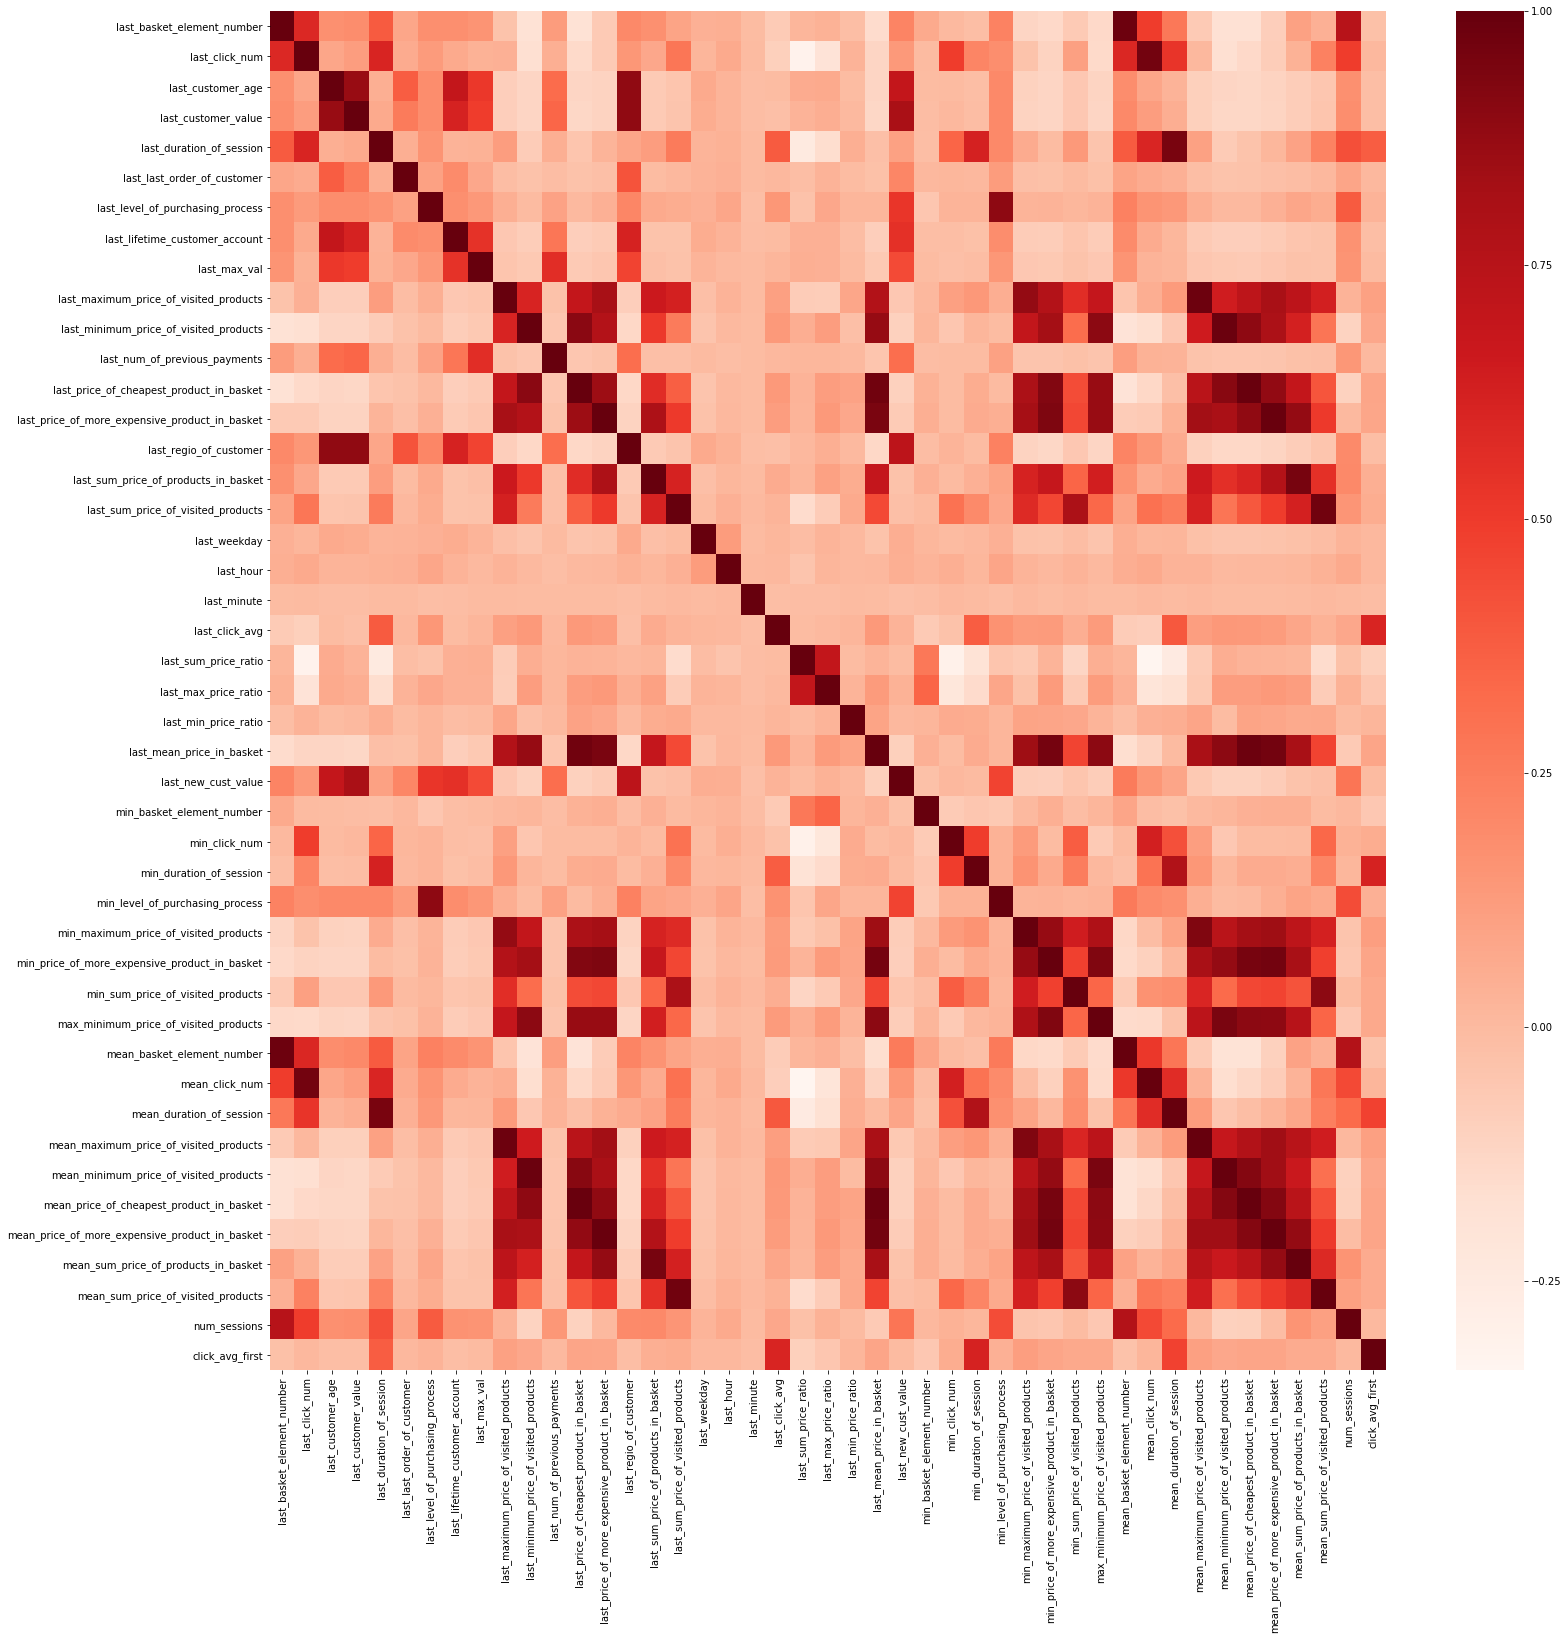

In [23]:
plt.figure(figsize=(25,25))
sns.heatmap(correlation_matrix, annot=False, cmap=plt.cm.Reds)
plt.show()

In [31]:
correlated_features = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.95:
            colname = correlation_matrix.columns[i]
            correlated_features.append(colname)

In [32]:
len(np.unique(np.array(correlated_features)))

11

In [33]:
correlated_features = list(np.unique(np.array(correlated_features)))
correlated_features

['last_mean_price_in_basket',
 'mean_basket_element_number',
 'mean_click_num',
 'mean_duration_of_session',
 'mean_maximum_price_of_visited_products',
 'mean_minimum_price_of_visited_products',
 'mean_price_of_cheapest_product_in_basket',
 'mean_price_of_more_expensive_product_in_basket',
 'mean_sum_price_of_products_in_basket',
 'mean_sum_price_of_visited_products',
 'min_price_of_more_expensive_product_in_basket']

These correlated columns convey similar information to the learning algorithm and therefore, should be removed.

In [34]:
selected_features = [col for col in unique_feature_names if col not in correlated_features]
len(selected_features)

34

In [35]:
selected_features

['last_basket_element_number',
 'last_click_num',
 'last_customer_age',
 'last_customer_value',
 'last_duration_of_session',
 'last_last_order_of_customer',
 'last_level_of_purchasing_process',
 'last_lifetime_customer_account',
 'last_max_val',
 'last_maximum_price_of_visited_products',
 'last_minimum_price_of_visited_products',
 'last_num_of_previous_payments',
 'last_price_of_cheapest_product_in_basket',
 'last_price_of_more_expensive_product_in_basket',
 'last_regio_of_customer',
 'last_sum_price_of_products_in_basket',
 'last_sum_price_of_visited_products',
 'last_weekday',
 'last_hour',
 'last_minute',
 'last_click_avg',
 'last_sum_price_ratio',
 'last_max_price_ratio',
 'last_min_price_ratio',
 'last_new_cust_value',
 'min_basket_element_number',
 'min_click_num',
 'min_duration_of_session',
 'min_level_of_purchasing_process',
 'min_maximum_price_of_visited_products',
 'min_sum_price_of_visited_products',
 'max_minimum_price_of_visited_products',
 'num_sessions',
 'click_avg_fir

# Save selected cols

In [36]:
must_colnames = list(cust_df.columns)[:3] 

In [37]:
cust_new = cust_df[must_colnames+selected_features].copy()
cust_new.shape

(49086, 37)

In [38]:
cust_new.to_csv("cust_df_selected_tuesday2.csv", index=False)